In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/flights.csv.zip')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [ ]:
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0


In [ ]:
df.describe(include='object')

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,334264,336776,336776,336776,336776
unique,336776,16,3844,4043,3,105,6936,16
top,336775,UA,15,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,1,58665,968,575,120835,17283,94,58665


In [ ]:
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

In [ ]:
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

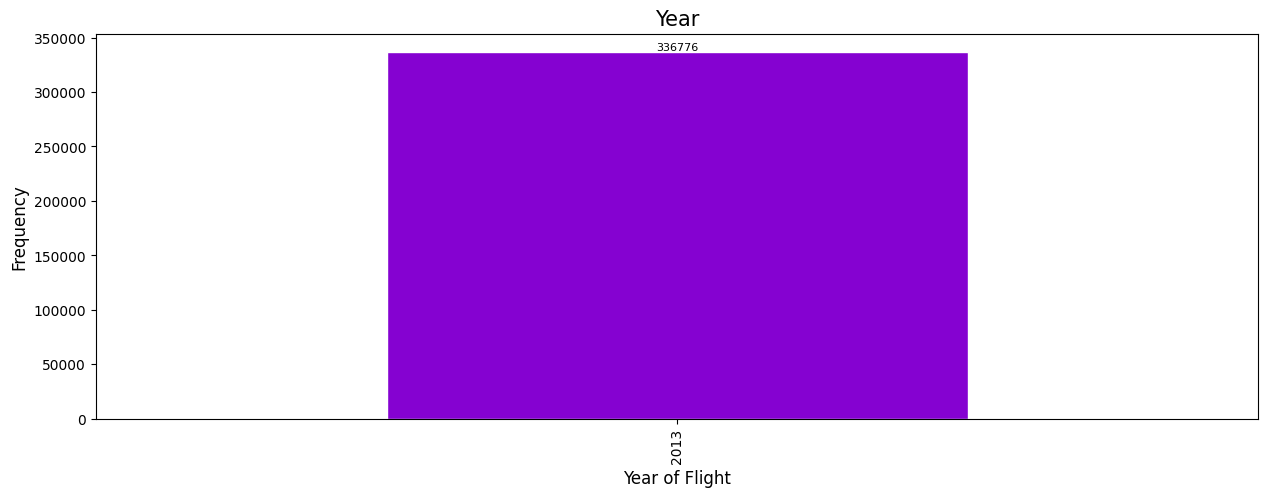

In [ ]:
plot_bar(df['year'], 'Year', 'Year of Flight')

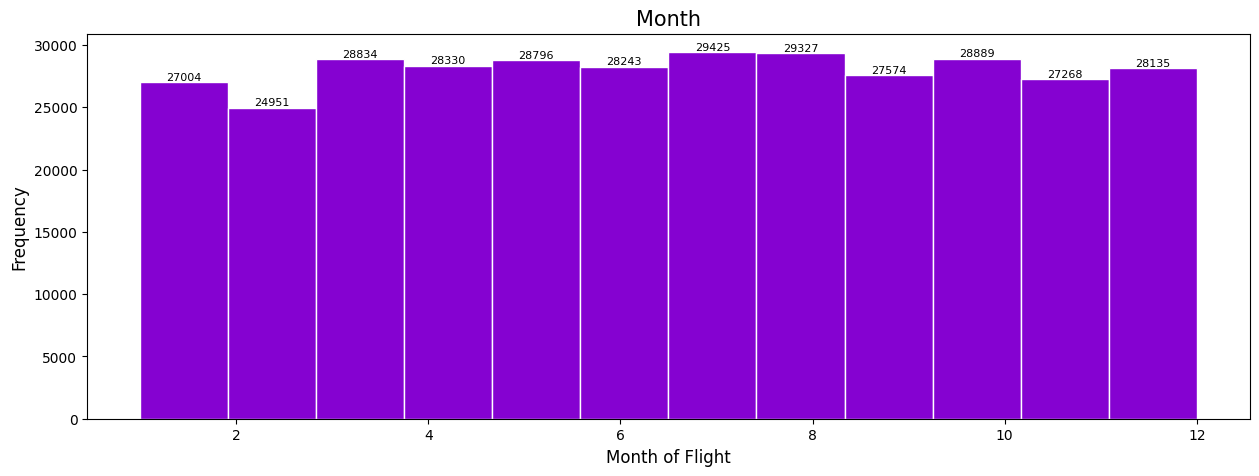

In [ ]:
plot_hist(df['month'], bins=12, title='Month', xlabel='Month of Flight')

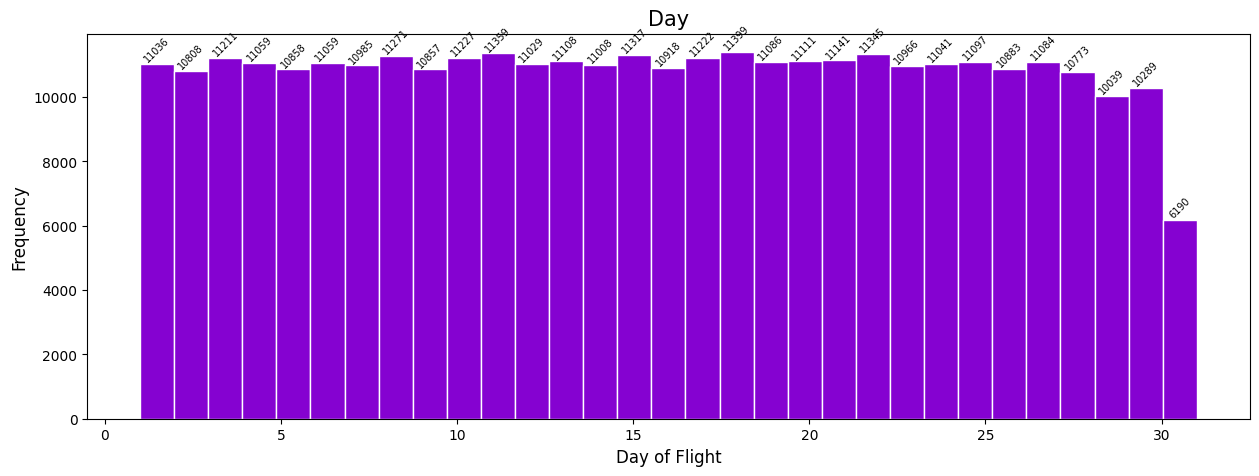

In [ ]:
plot_hist(df['day'], bins=31, title='Day', xlabel='Day of Flight', fontsize=7, rotation=45)

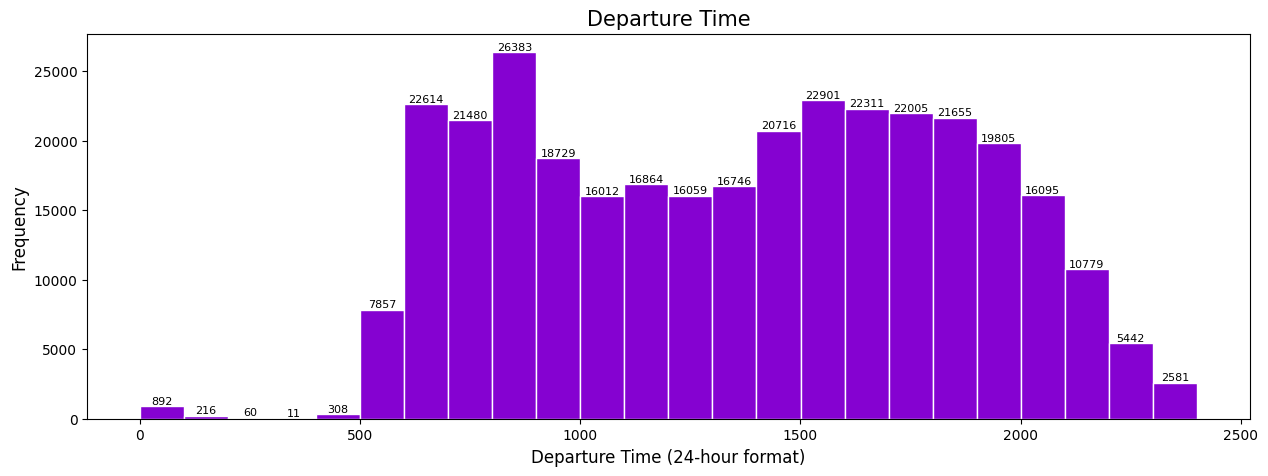

In [ ]:
plot_hist(df['dep_time'].dropna(), bins=24, title='Departure Time', xlabel='Departure Time (24-hour format)')

sched dep tym


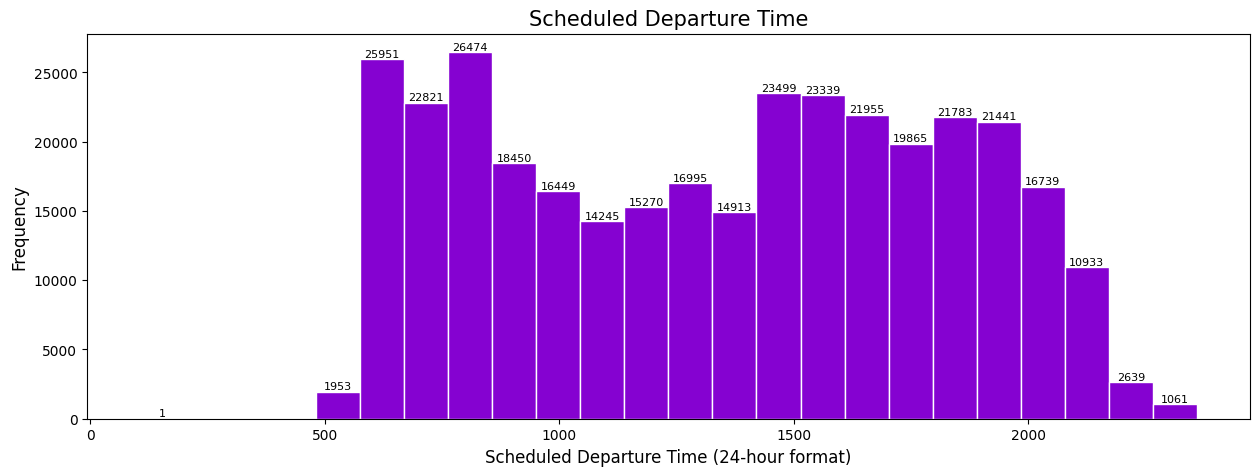

In [ ]:
plot_hist(df['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time (24-hour format)')

dep delay

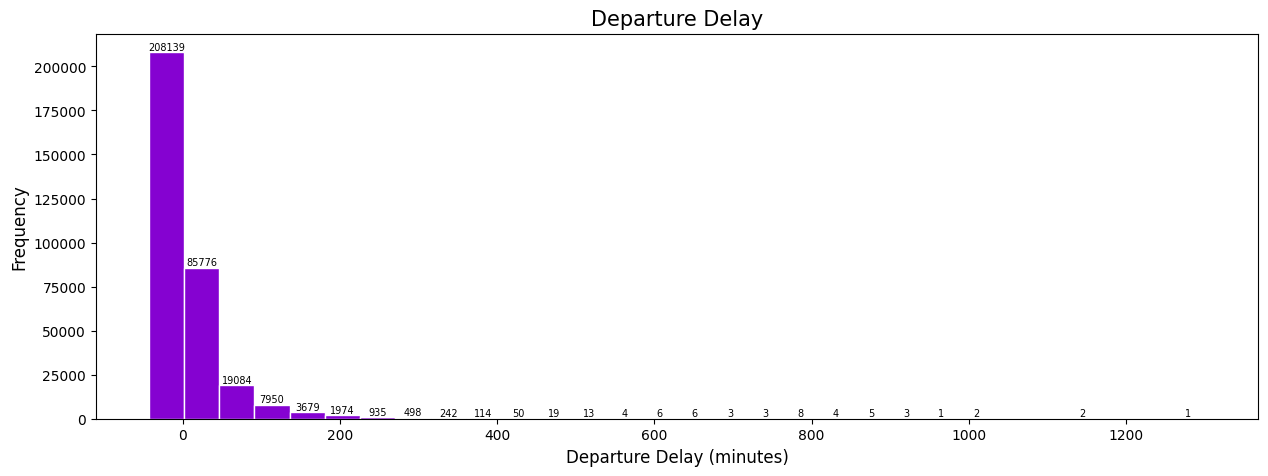

In [ ]:
plot_hist(df['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

actual arrival tym

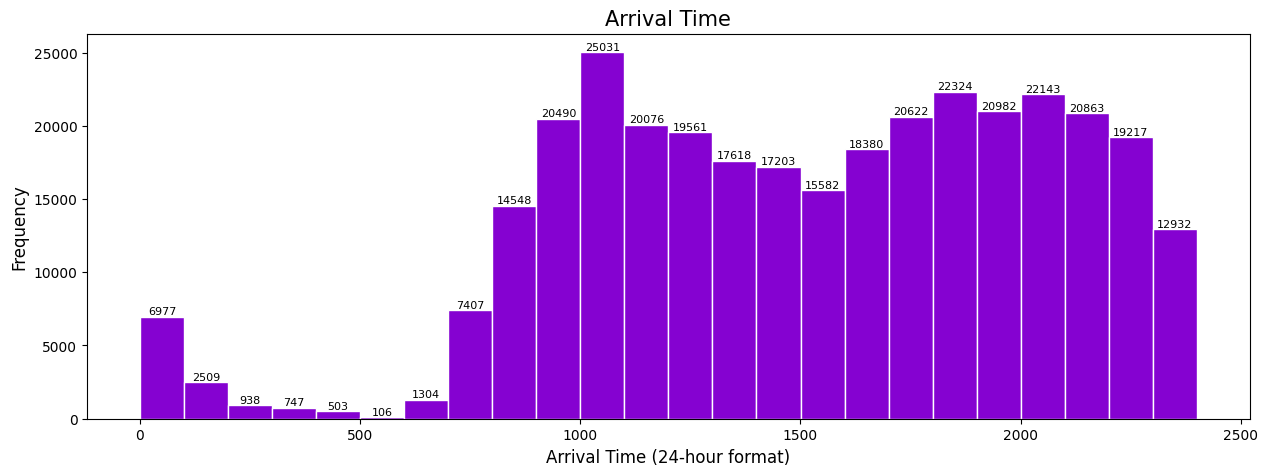

In [ ]:
plot_hist(df['arr_time'].dropna(), bins=24, title='Arrival Time', xlabel='Arrival Time (24-hour format)')

scheduled arrvl tym

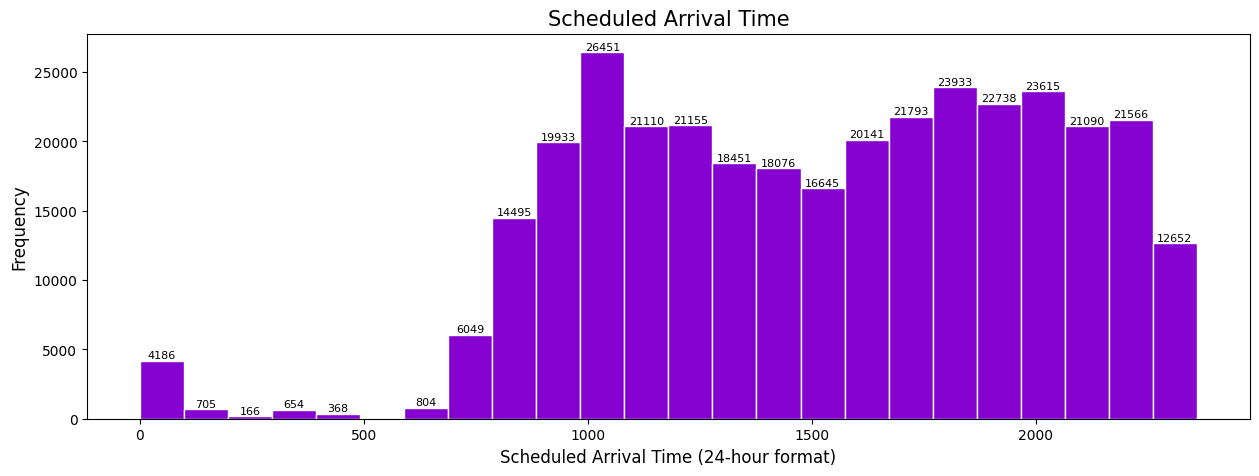

In [ ]:
plot_hist(df['sched_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Scheduled Arrival Time (24-hour format)')

arrival delay

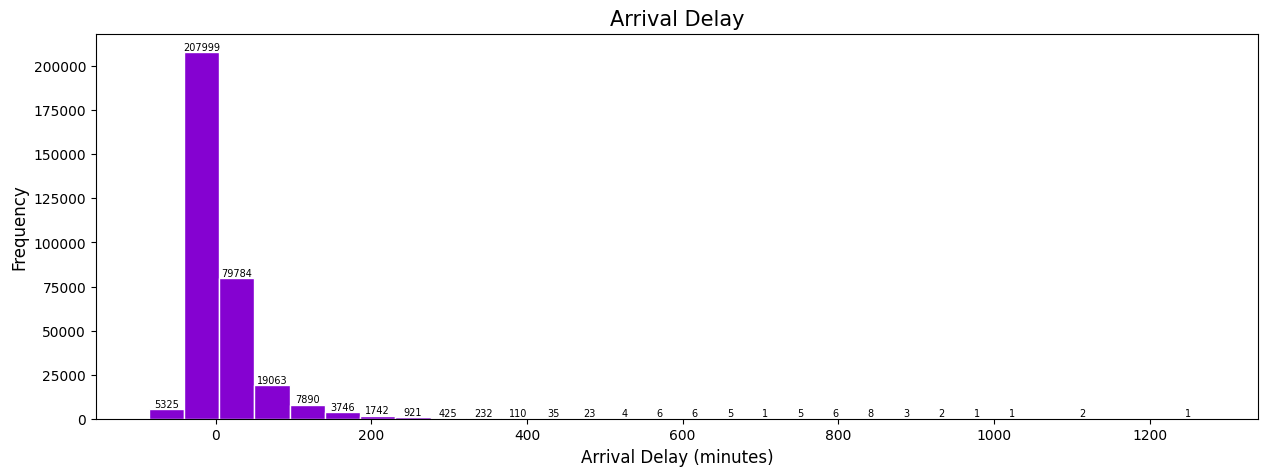

In [ ]:
plot_hist(df['arr_delay'].dropna(), bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

carrier

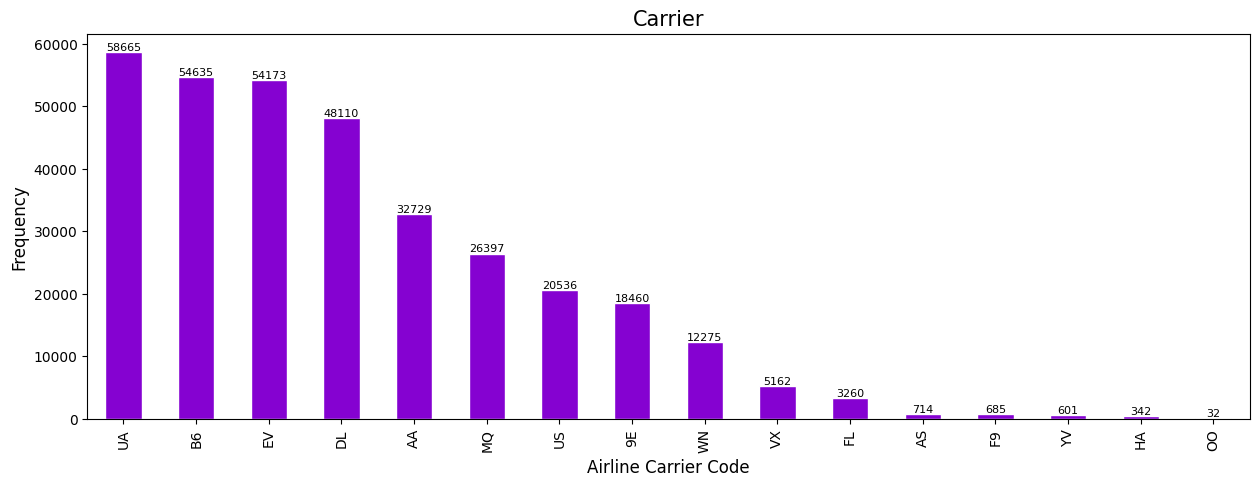

In [ ]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar(df['carrier'], 'Carrier', 'Airline Carrier Code')

origin

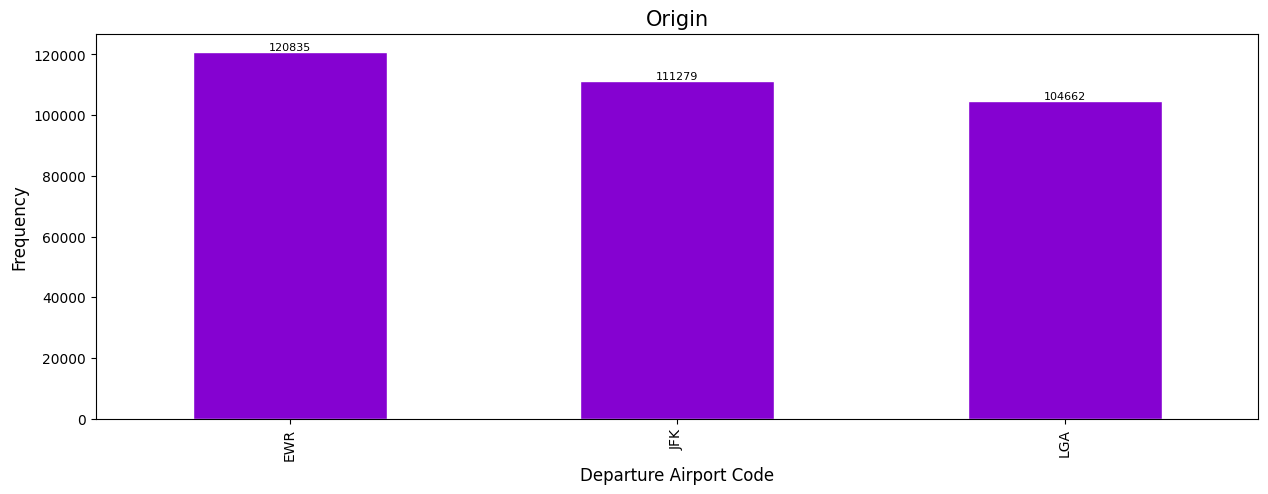

In [ ]:
# A three-letter code signifying the airport from which the flight departed.
plot_bar(df['origin'], 'Origin', 'Departure Airport Code')

destination

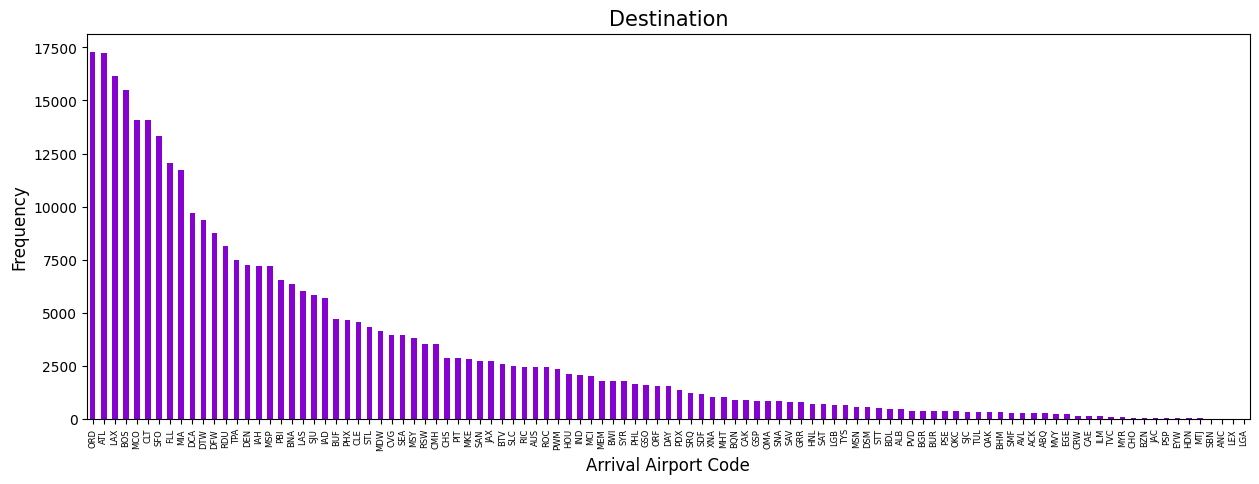

In [ ]:
# A three-letter code representing the airport at which the flight arrived.
plt.figure(figsize=(15,5))
df['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

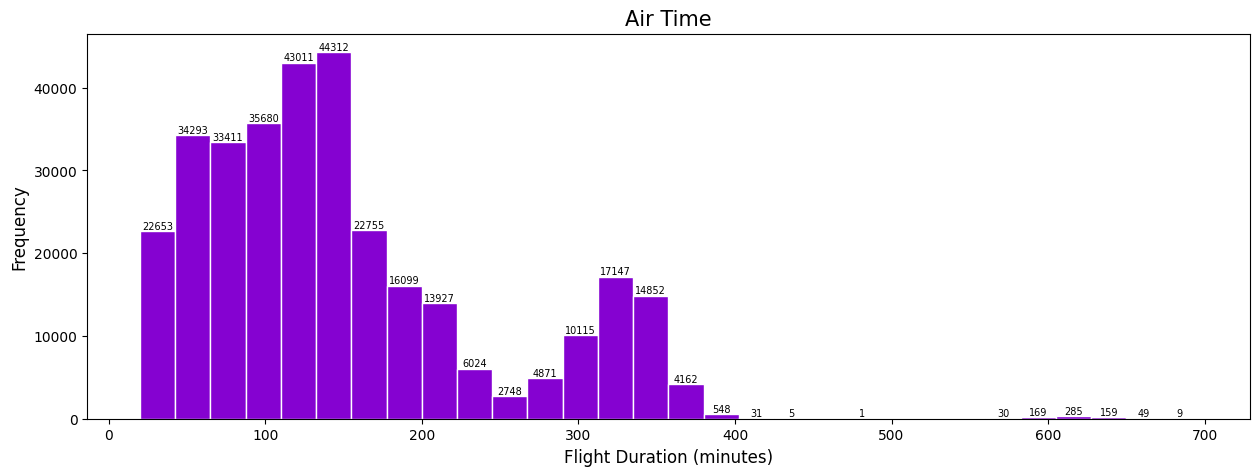

In [ ]:
# The duration of the flight, measured in minutes.
plot_hist(df['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

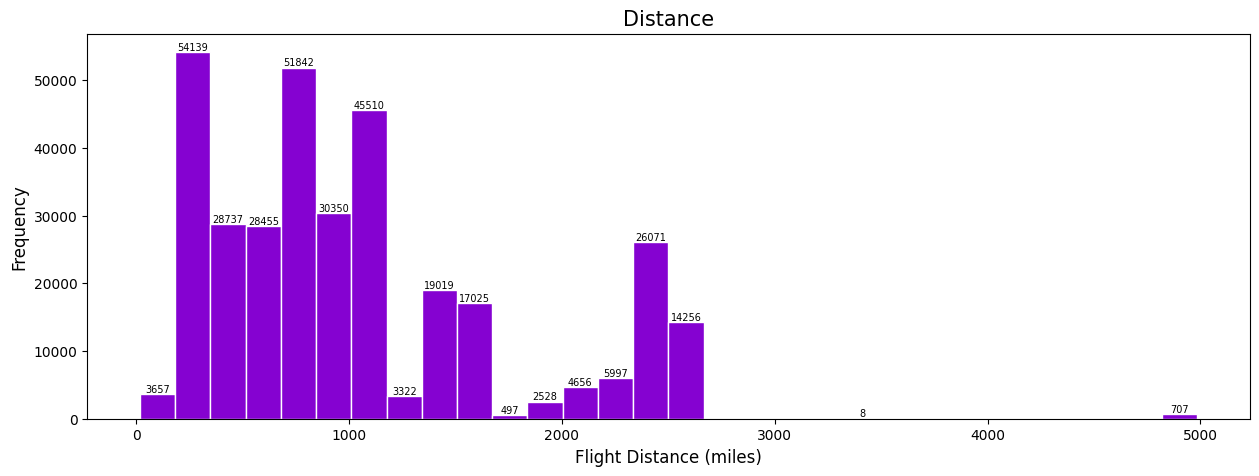

In [ ]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(df['distance'], bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7)

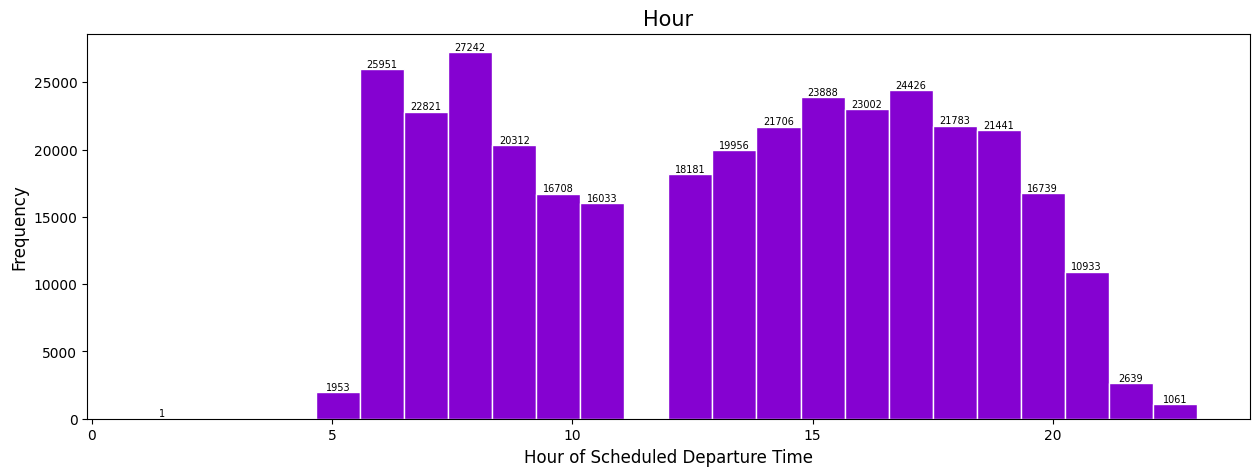

In [ ]:
plot_hist(df['hour'], bins=24, title='Hour', xlabel='Hour of Scheduled Departure Time', fontsize=7)

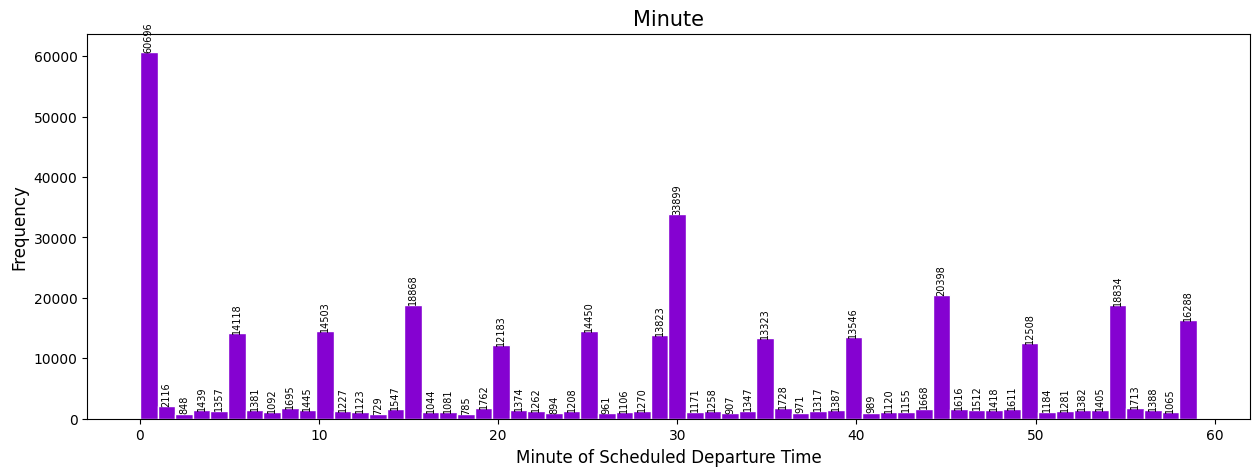

In [ ]:
plot_hist(df['minute'], bins=60, title='Minute', xlabel='Minute of Scheduled Departure Time', fontsize=7, rotation=90)

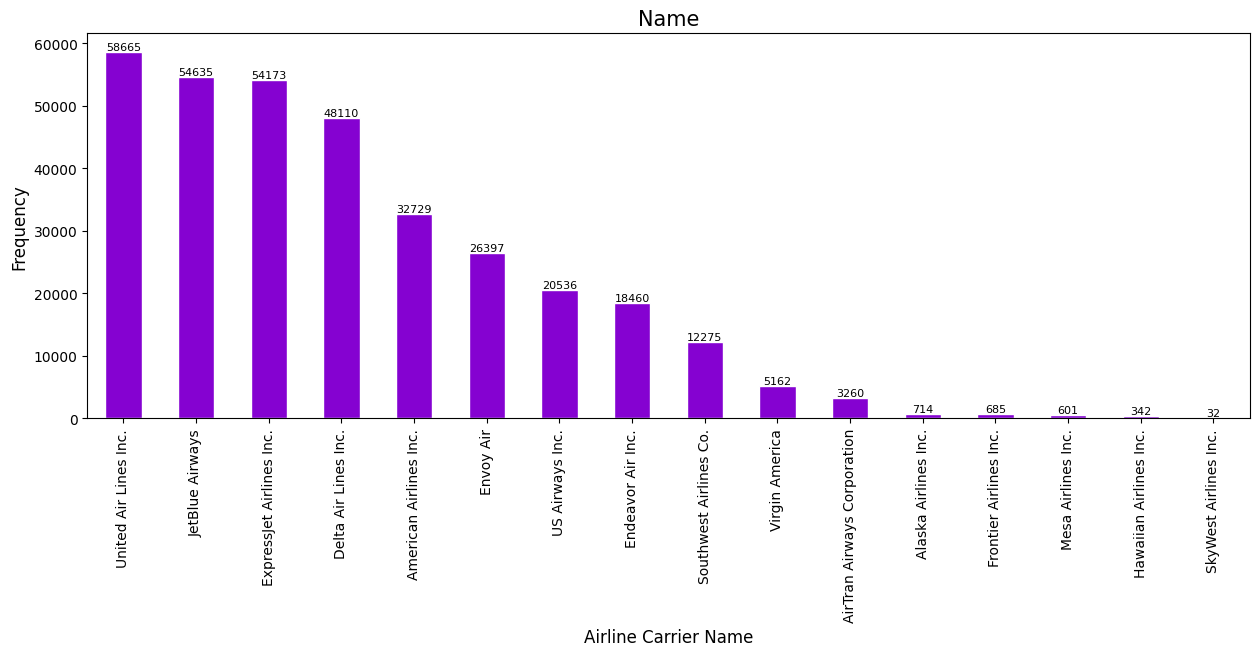

In [ ]:
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

In [ ]:
# Define color palette with different shades of color #8502d1 for boxplots
colors_box = sns.dark_palette("#8502d1", as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("#8502d1", as_cmap=True)

# Define the function to plot scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()

# Define the function to plot violin plots
def plot_violin(x, y, title, xlabel, ylabel, fontsize=8):
    plt.figure(figsize=(15,5))
    sns.violinplot(x=x, y=y, palette=colors_box)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.show()

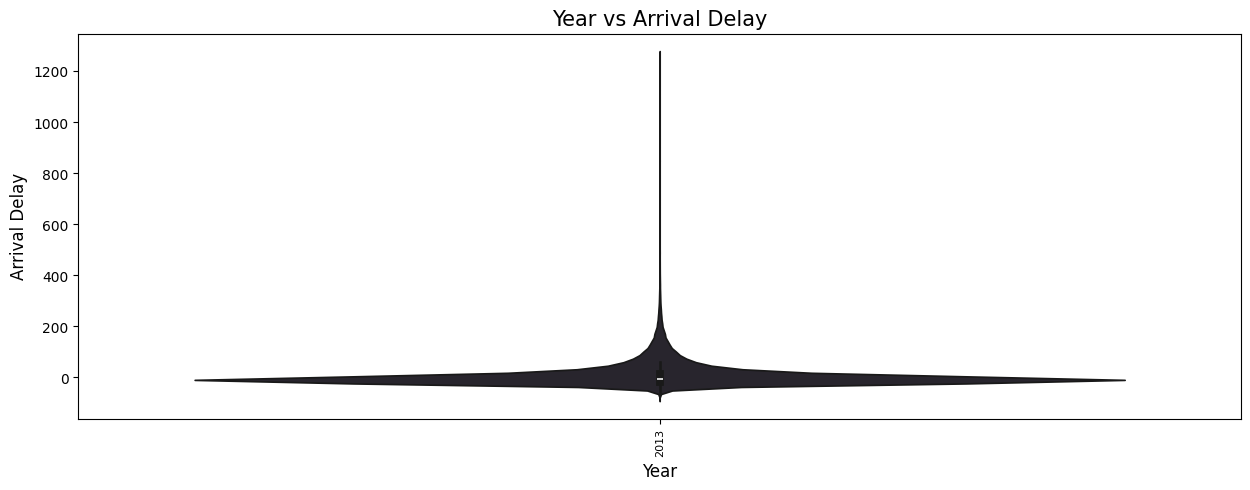

In [ ]:
# year vs arr_delay
plot_violin(df['year'], df['arr_delay'], 'Year vs Arrival Delay', 'Year', 'Arrival Delay')

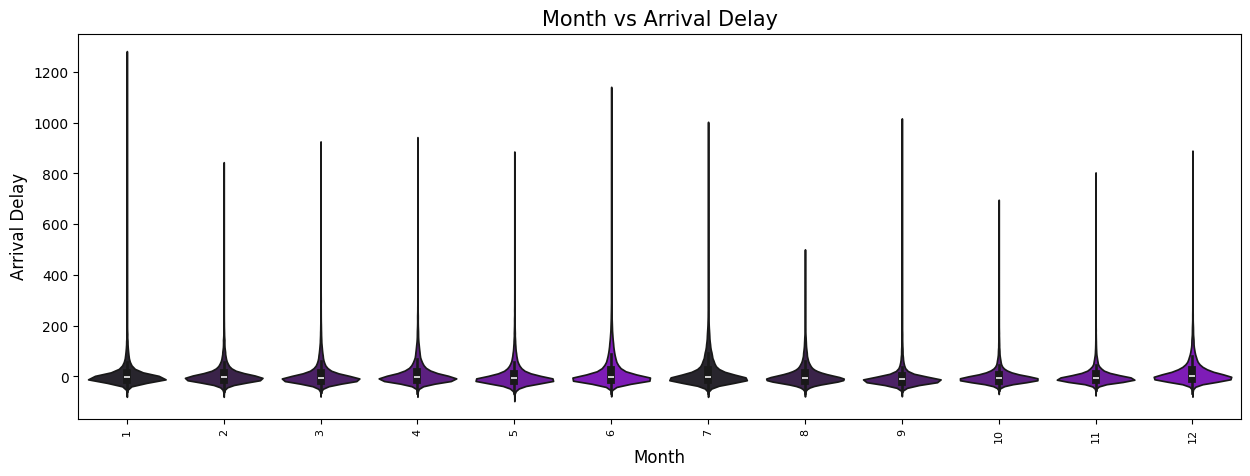

In [ ]:
# month vs arr_delay
plot_violin(df['month'], df['arr_delay'], 'Month vs Arrival Delay', 'Month', 'Arrival Delay')

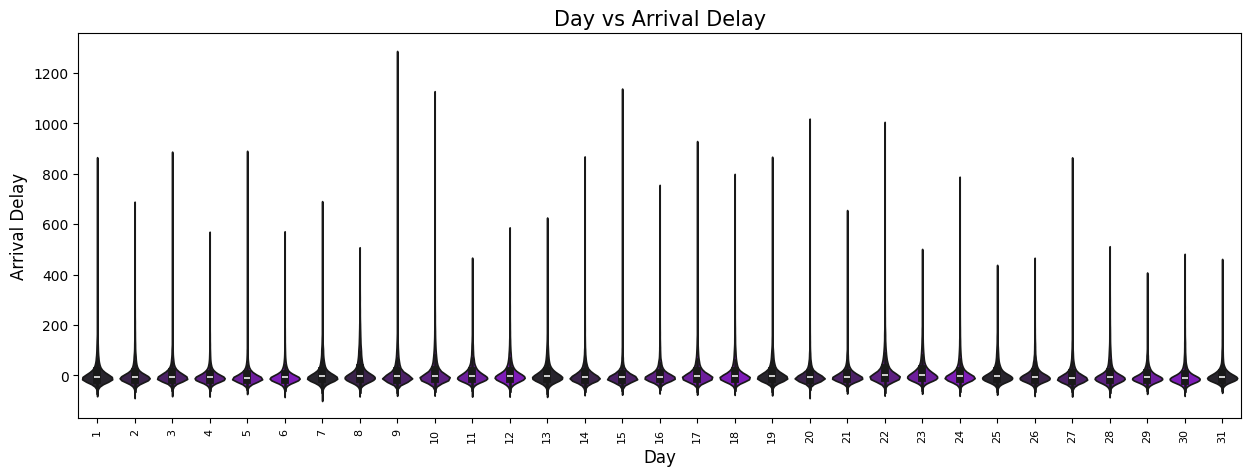

In [ ]:
# day vs arr_delay
plot_violin(df['day'], df['arr_delay'], 'Day vs Arrival Delay', 'Day', 'Arrival Delay')

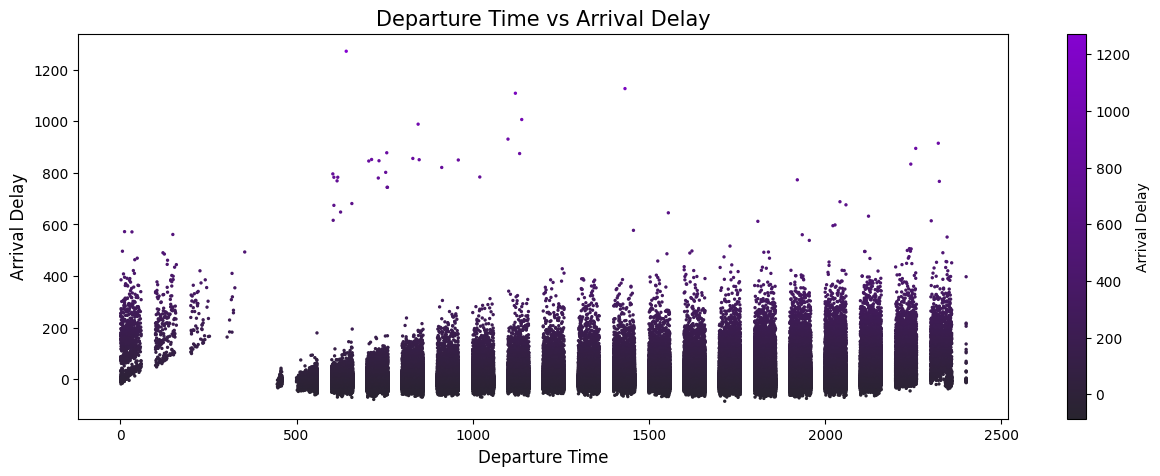

In [ ]:
# dep_time vs arr_delay
plot_scatter(df['dep_time'], df['arr_delay'], 'Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

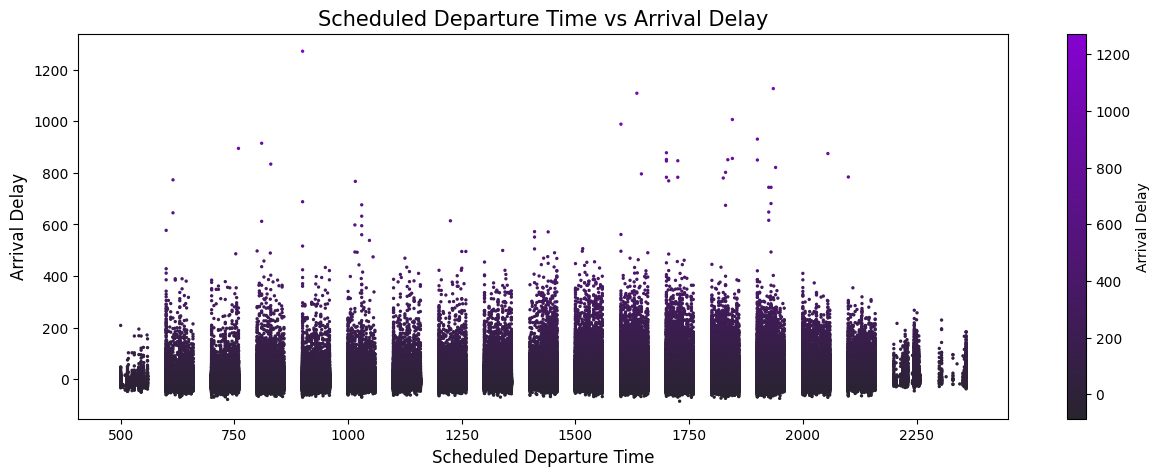

In [ ]:
# sched_dep_time vs arr_delay
plot_scatter(df['sched_dep_time'], df['arr_delay'], 'Scheduled Departure Time vs Arrival Delay', 'Scheduled Departure Time', 'Arrival Delay')

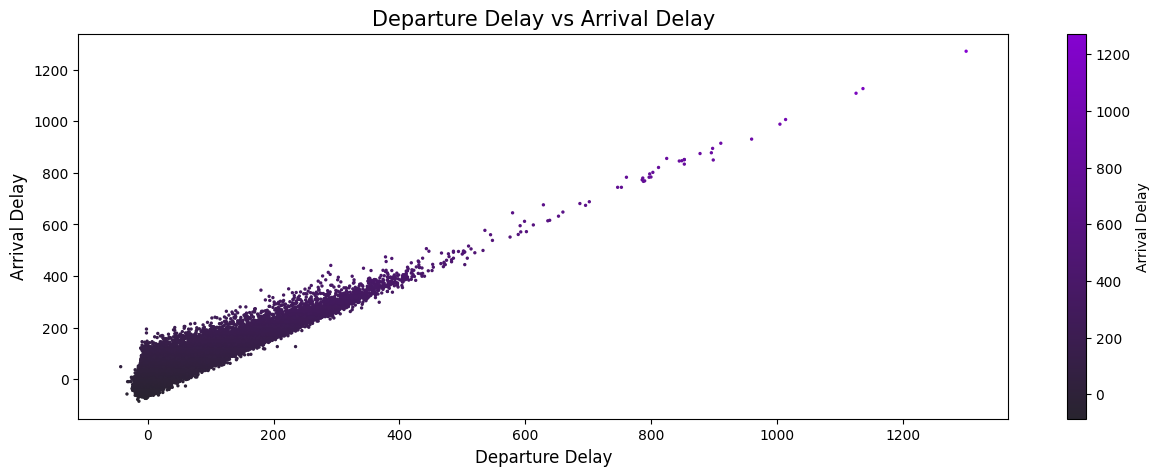

In [ ]:
# dep_delay vs arr_delay
plot_scatter(df['dep_delay'], df['arr_delay'], 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

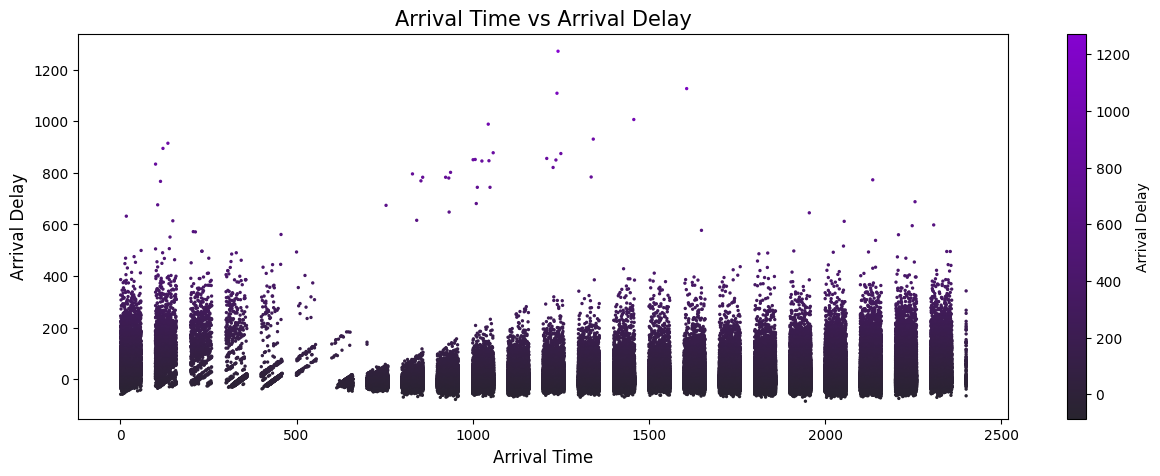

In [ ]:
# arr_time vs arr_delay
plot_scatter(df['arr_time'], df['arr_delay'], 'Arrival Time vs Arrival Delay', 'Arrival Time', 'Arrival Delay')

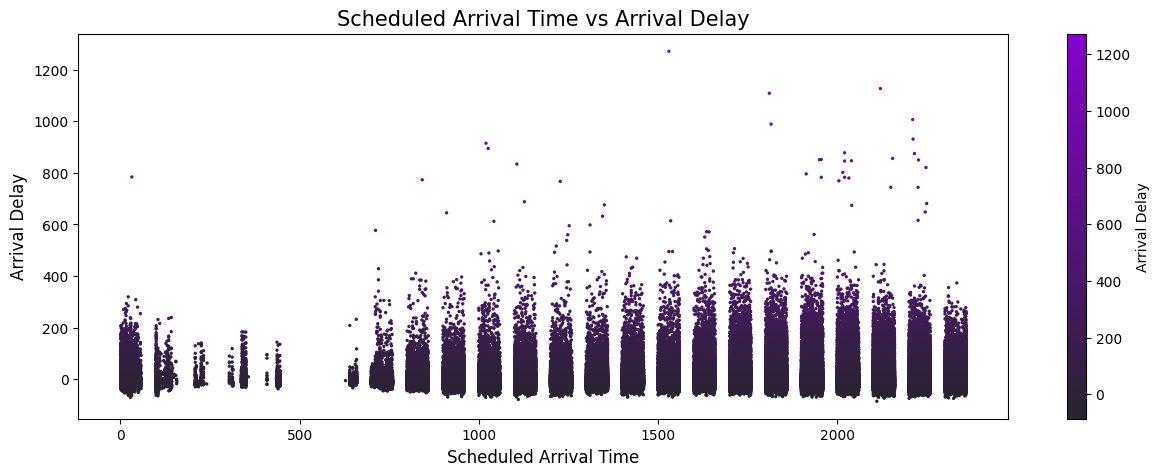

In [ ]:
# sched_arr_time vs arr_delay
plot_scatter(df['sched_arr_time'], df['arr_delay'], 'Scheduled Arrival Time vs Arrival Delay', 'Scheduled Arrival Time', 'Arrival Delay')


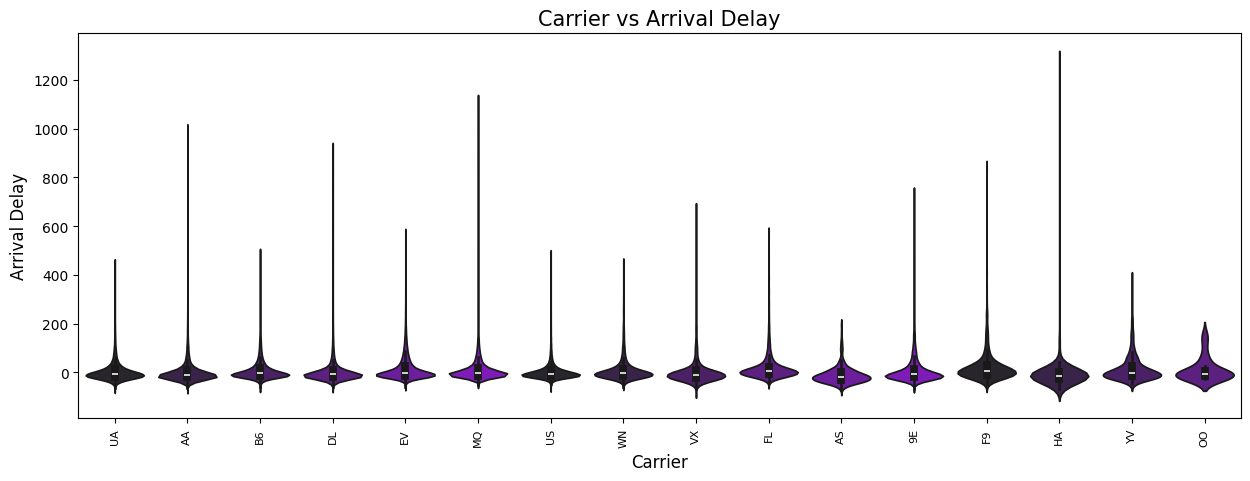

In [ ]:
# carrier vs arr_delay
plot_violin(df['carrier'], df['arr_delay'], 'Carrier vs Arrival Delay', 'Carrier', 'Arrival Delay')

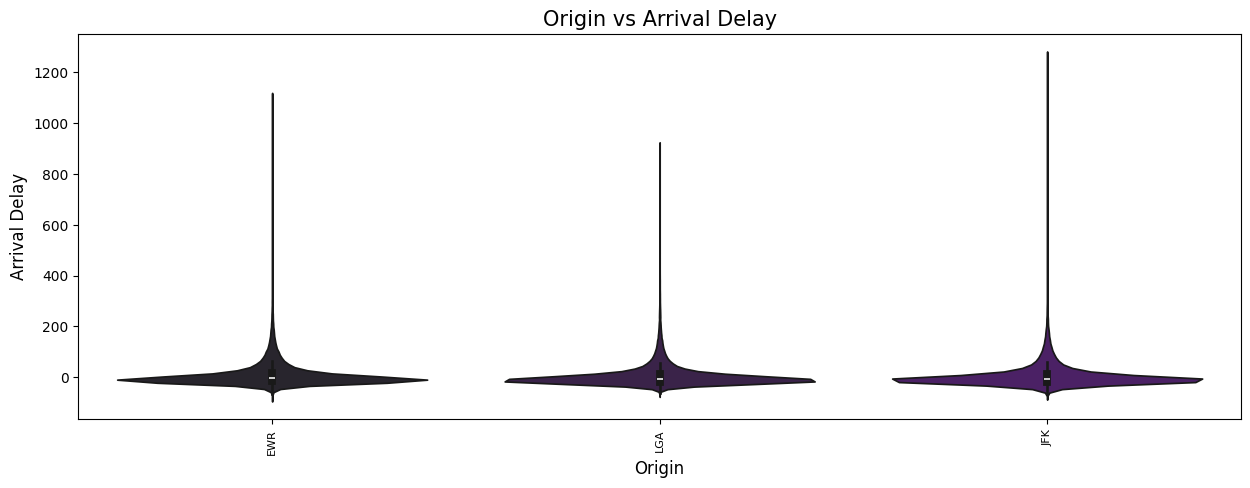

In [ ]:
# origin vs arr_delay
plot_violin(df['origin'], df['arr_delay'], 'Origin vs Arrival Delay', 'Origin', 'Arrival Delay')

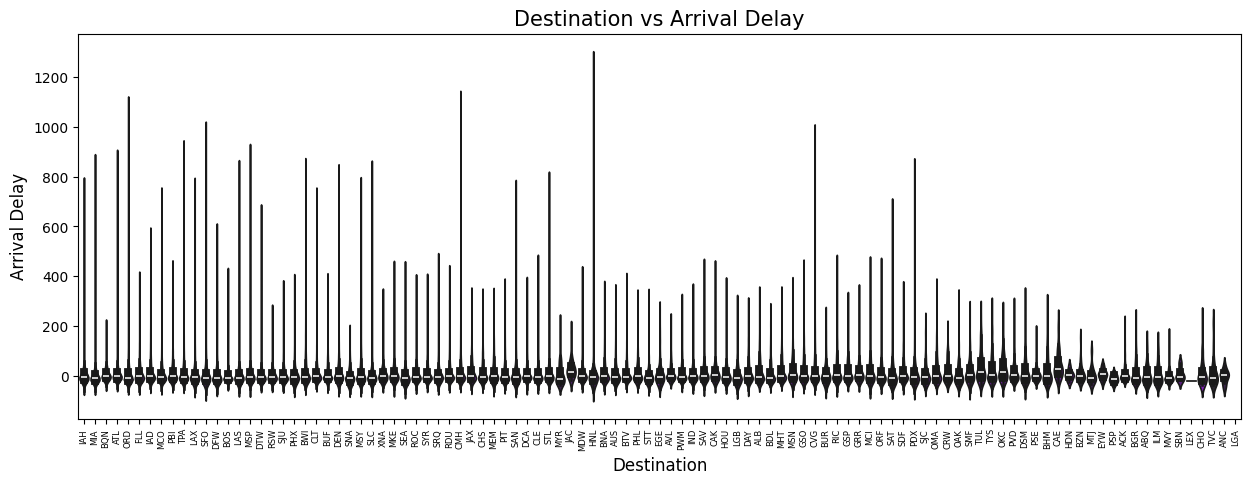

In [ ]:
# dest vs arr_delay
plot_violin(df['dest'], df['arr_delay'], 'Destination vs Arrival Delay', 'Destination', 'Arrival Delay', fontsize=6)

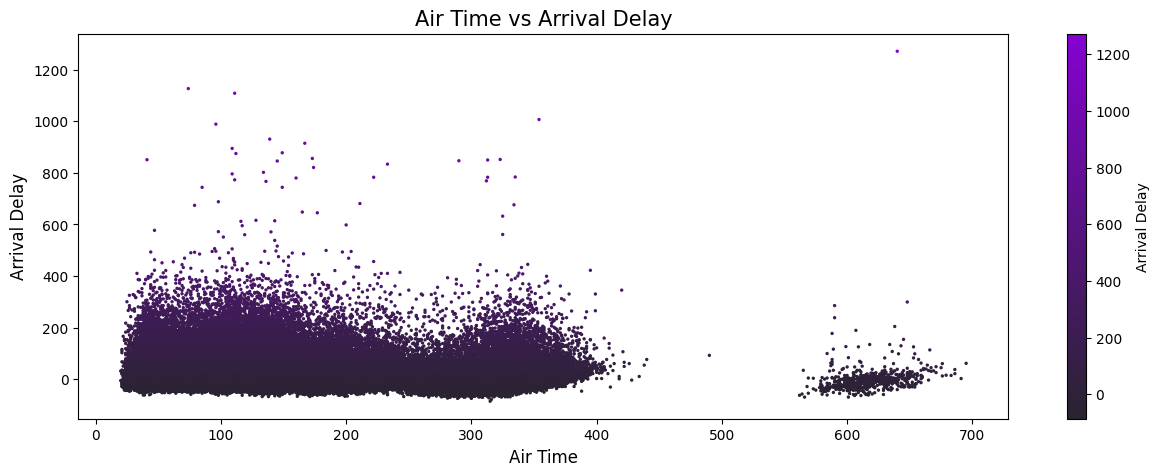

In [ ]:
# air_time vs arr_delay
plot_scatter(df['air_time'], df['arr_delay'], 'Air Time vs Arrival Delay', 'Air Time', 'Arrival Delay')

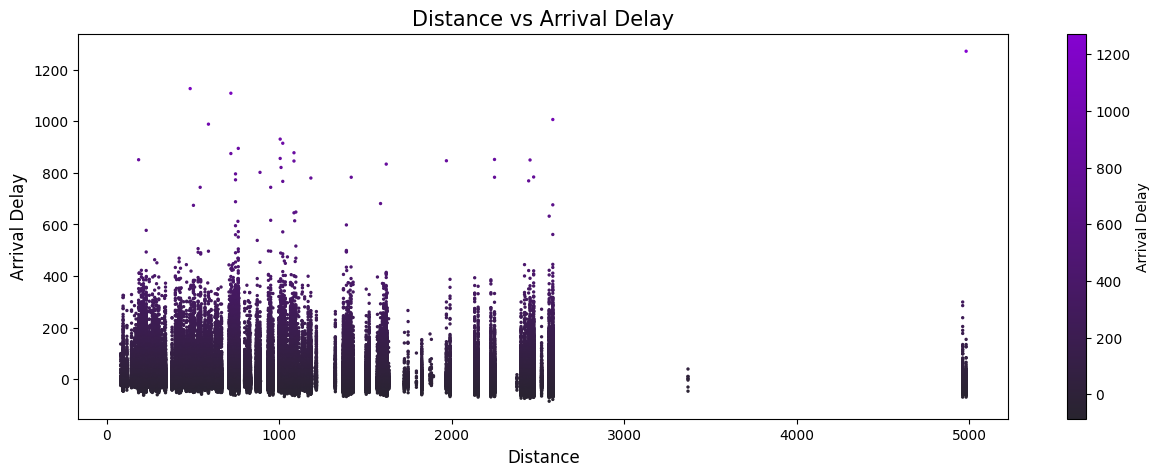

In [ ]:
# distance vs arr_delay
plot_scatter(df['distance'], df['arr_delay'], 'Distance vs Arrival Delay', 'Distance', 'Arrival Delay')

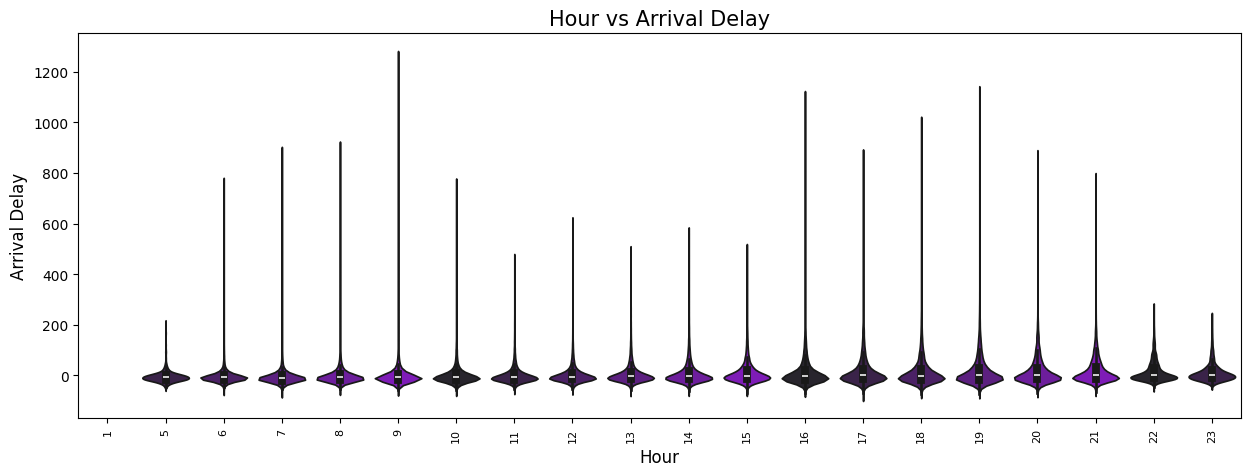

In [ ]:
# hour vs arr_delay
plot_violin(df['hour'], df['arr_delay'], 'Hour vs Arrival Delay', 'Hour', 'Arrival Delay')

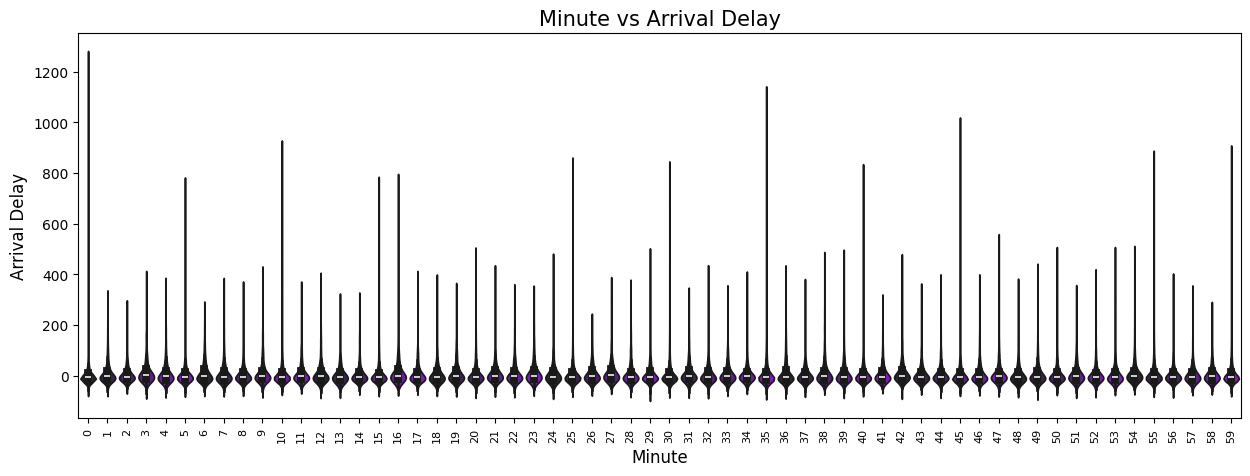

In [ ]:
# minute vs arr_delay
plot_violin(df['minute'], df['arr_delay'], 'Minute vs Arrival Delay', 'Minute', 'Arrival Delay')

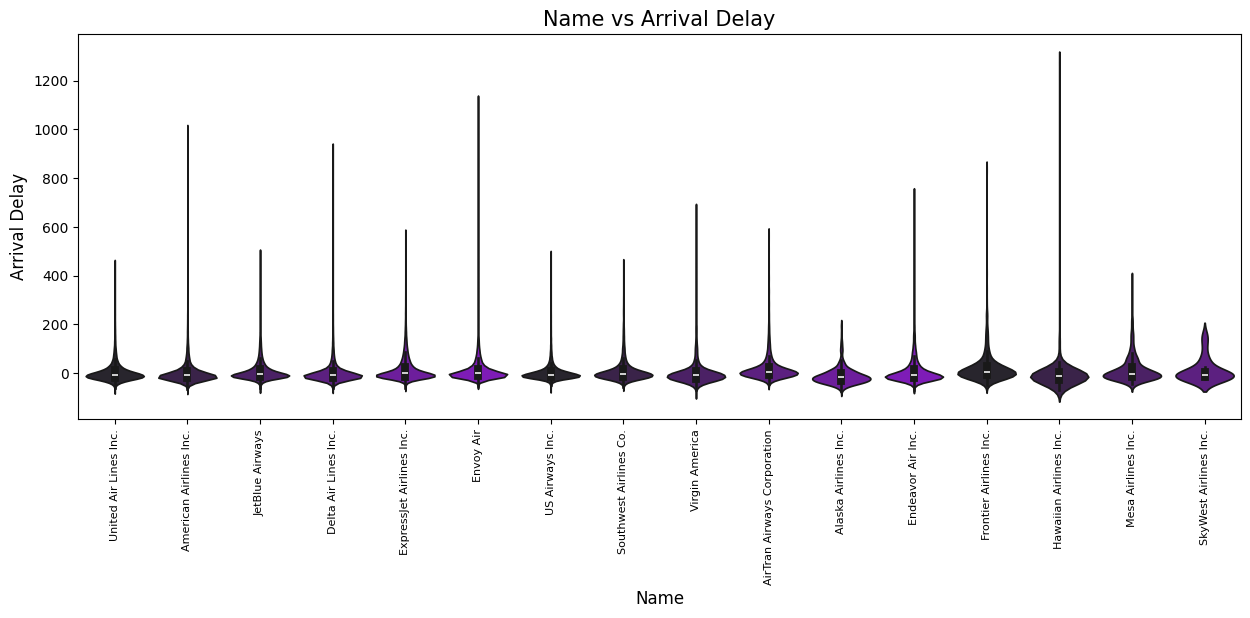

In [ ]:
# name vs arr_delay
plot_violin(df['name'], df['arr_delay'], 'Name vs Arrival Delay', 'Name', 'Arrival Delay')

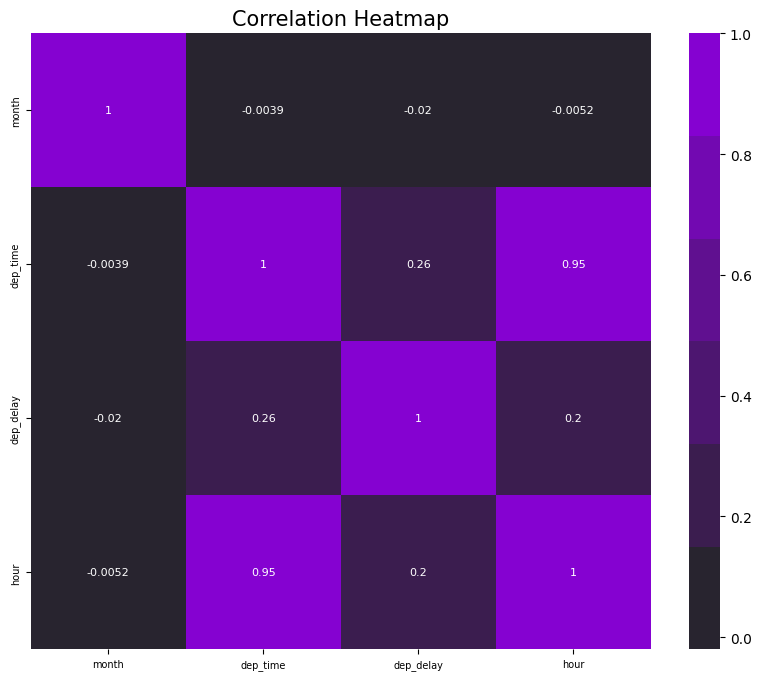

In [ ]:
# Define color palette with different shades of color #8502d1 for multivariate plots
colors_multi = sns.dark_palette("#8502d1", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

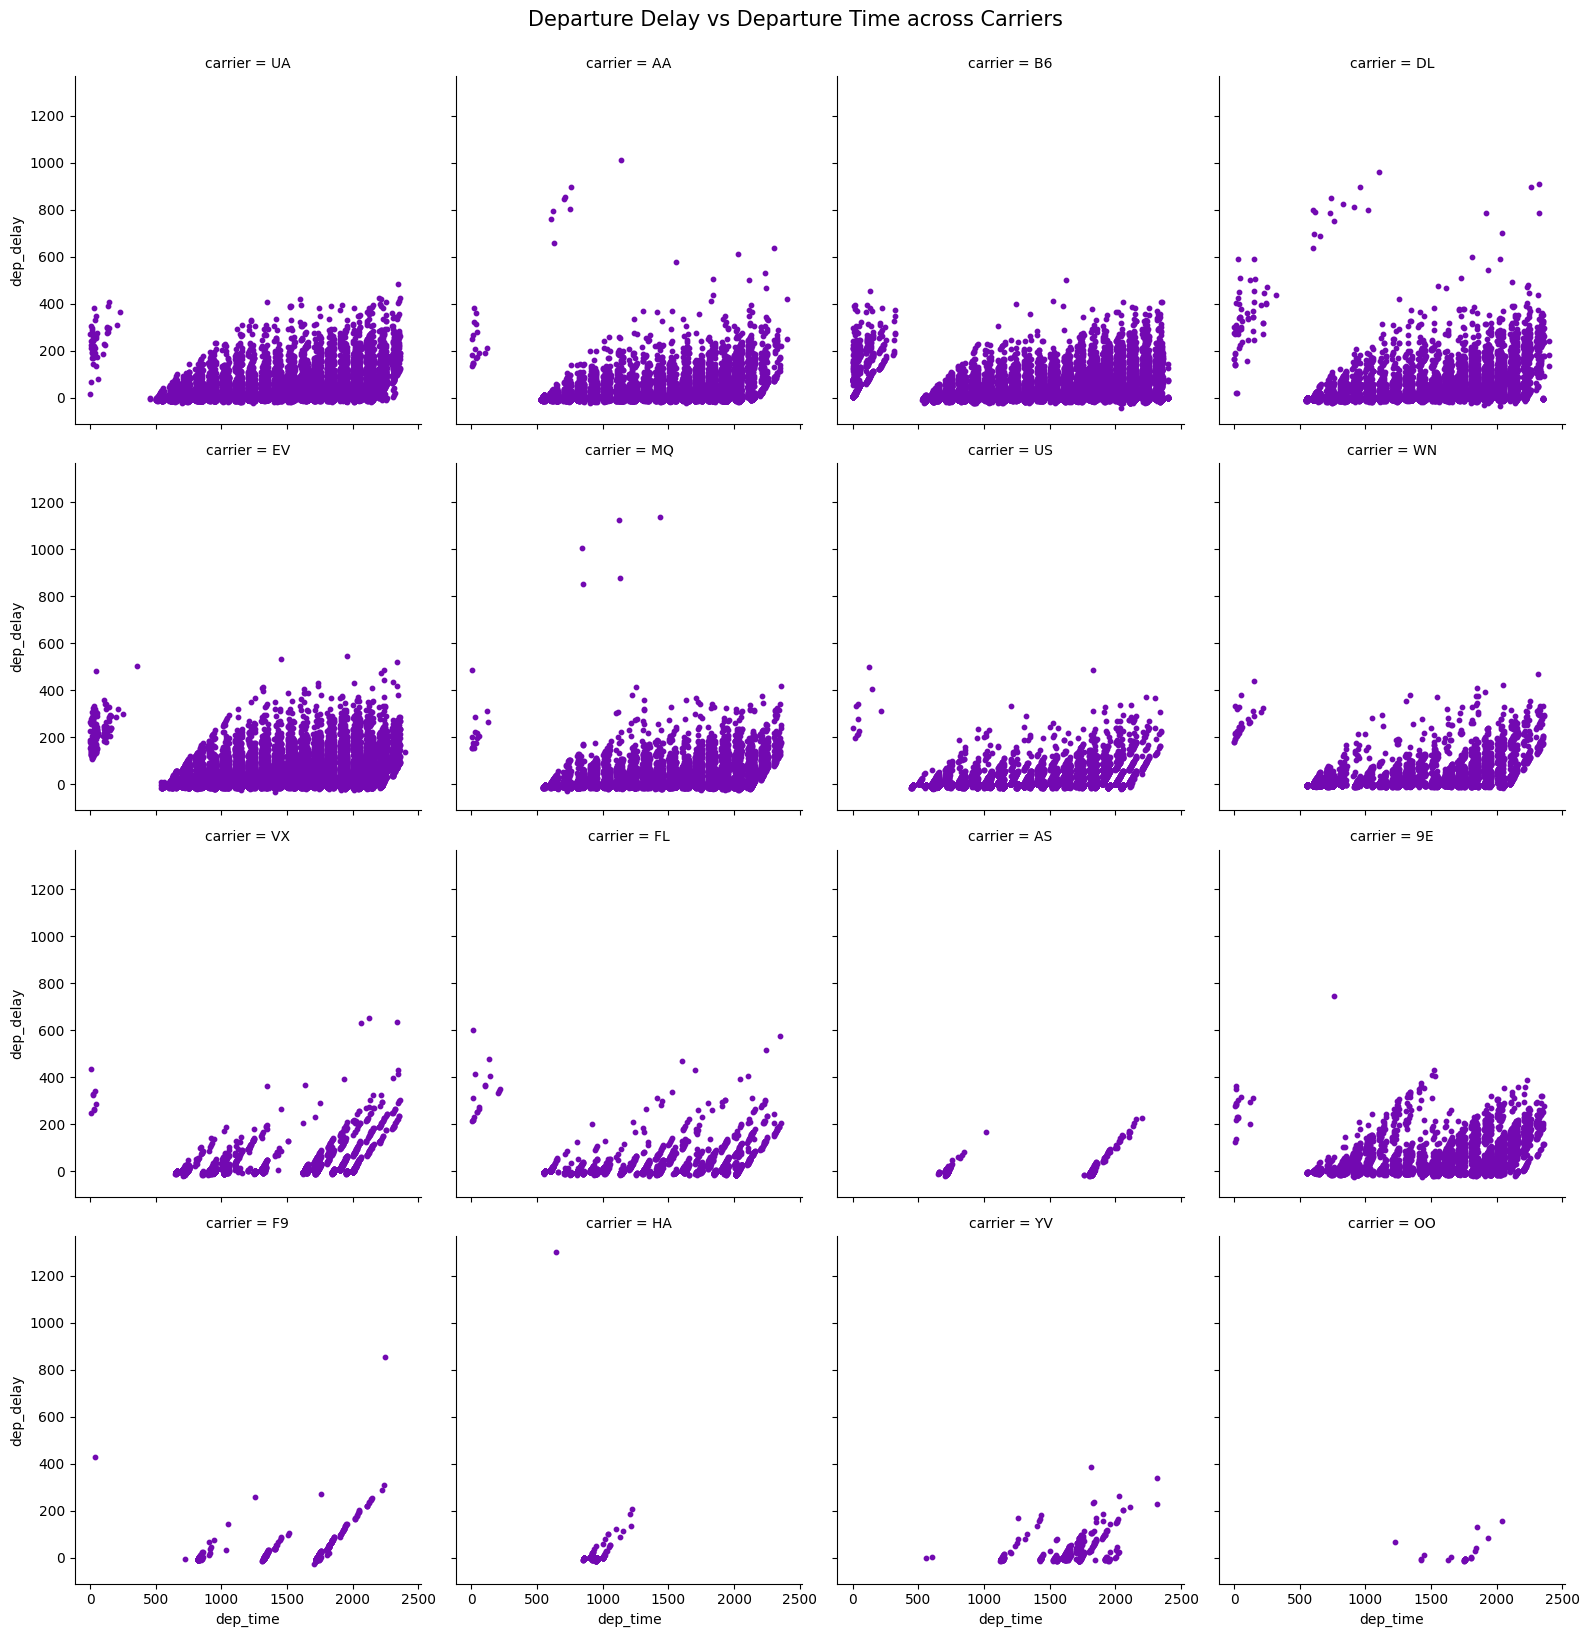

In [ ]:
# 'dep_delay' vs 'dep_time' across different 'carrier'
g = sns.FacetGrid(df, col="carrier", col_wrap=4, height=4, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

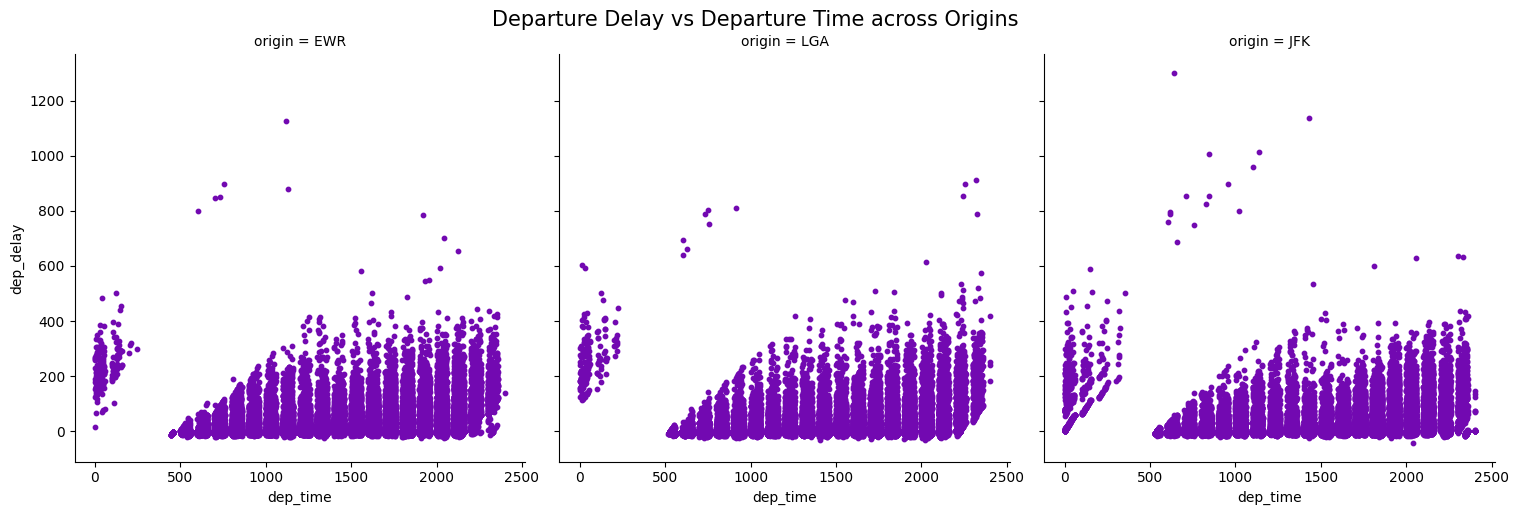

In [ ]:
# 'dep_delay' vs 'dep_time' across different 'origin'
g = sns.FacetGrid(df, col="origin", col_wrap=4, height=5, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Origins', fontsize=15, y=1.02, x=0.38)
plt.show()

In [ ]:
df.drop(['id', 'year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'name'],
      dtype='object')

In [ ]:
# Check the percentage of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 arr_delay         2.80
air_time          2.80
arr_time          2.59
dep_delay         2.45
dep_time          2.45
sched_dep_time    0.00
day               0.00
month             0.00
sched_arr_time    0.00
origin            0.00
dest              0.00
distance          0.00
name              0.00
dtype: float64


In [ ]:
df.dropna(subset=['arr_delay'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Separate features and target
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

np.int64(0)

In [ ]:
# Identify categorical columns
cat_columns = X.select_dtypes(include=['object']).columns

# Check the number of unique categories in each categorical feature
X[cat_columns].nunique()

,0
origin,3
dest,104
name,16


In [ ]:
# Check the distribution of categories within each feature
for col in cat_columns:
    print(f"\nDistribution of categories in {col}:")
    print(X[col].value_counts())


Distribution of categories in origin:
origin
EWR    117127
JFK    109079
LGA    101140
Name: count, dtype: int64

Distribution of categories in dest:
dest
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
       ...  
MTJ       14
HDN       14
SBN       10
ANC        8
LEX        1
Name: count, Length: 104, dtype: int64

Distribution of categories in name:
name
United Air Lines Inc.          57782
JetBlue Airways                54049
ExpressJet Airlines Inc.       51108
Delta Air Lines Inc.           47658
American Airlines Inc.         31947
Envoy Air                      25037
US Airways Inc.                19831
Endeavor Air Inc.              17294
Southwest Airlines Co.         12044
Virgin America                  5116
AirTran Airways Corporation     3175
Alaska Airlines Inc.             709
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: count, dtype: int64


In [ ]:
# Create a copy of the dataset for encoding
X_encoded = X.copy()

# Apply one-hot encoding to 'carrier', 'origin', and 'name'
X_encoded = pd.get_dummies(X_encoded, columns=['origin', 'name'], drop_first=True)

# Apply frequency encoding to 'dest'
dest_freq = X_encoded['dest'].value_counts() / len(X_encoded)  # calculate the frequencies
X_encoded['dest'] = X_encoded['dest'].map(dest_freq)  # map frequencies to the feature

# Show the result
X_encoded.head()


,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,dest,air_time,distance,...,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_Hawaiian Airlines Inc.,name_JetBlue Airways,name_Mesa Airlines Inc.,name_SkyWest Airlines Inc.,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America
0,1,1,517.0,515,2.0,830.0,819,0.021644,227.0,1400,...,False,False,False,False,False,False,False,False,True,False
1,1,1,533.0,529,4.0,850.0,830,0.021644,227.0,1416,...,False,False,False,False,False,False,False,False,True,False
2,1,1,542.0,540,2.0,923.0,850,0.035415,160.0,1089,...,False,False,False,False,False,False,False,False,False,False
3,1,1,544.0,545,-1.0,1004.0,1022,0.002713,183.0,1576,...,False,False,False,True,False,False,False,False,False,False
4,1,1,554.0,600,-6.0,812.0,837,0.051435,116.0,762,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Time Feature Transformation
def transform_time(df, columns):
    for col in columns:
        df[col + '_sin'] = np.sin(2 * np.pi * df[col]/2400)
        df[col + '_cos'] = np.cos(2 * np.pi * df[col]/2400)
        df.drop(columns=col, inplace=True)
    return df

# List of 'hhmm' formatted features
time_cols = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']

# Apply transformation
X_encoded = transform_time(X_encoded, time_cols)

X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,1,1,2.0,0.021644,227.0,1400,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,1,1,4.0,0.021644,227.0,1416,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,1,1,2.0,0.035415,160.0,1089,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,1,1,-1.0,0.002713,183.0,1576,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,1,1,-6.0,0.051435,116.0,762,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [ ]:
# Define binary, cyclic, and continuous columns
binary_cols     = [col for col in X_encoded.columns if X_encoded[col].value_counts().index.isin([0,1]).all()]
cyclic_cols     = [col for col in X_encoded.columns if col.endswith('_cos') or col.endswith('_sin')]
continuous_cols = [col for col in X_encoded.columns if col not in binary_cols + cyclic_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the continuous features
X_encoded[continuous_cols] = scaler.fit_transform(X_encoded[continuous_cols])

# Show the result
X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,-1.630263,-1.679414,-0.263447,-0.290559,0.814548,0.477816,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,-1.630263,-1.679414,-0.213529,-0.290559,0.814548,0.499558,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,-1.630263,-1.679414,-0.263447,0.558148,0.099410,0.055209,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,-1.630263,-1.679414,-0.338324,-1.457249,0.344905,0.716977,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,-1.630263,-1.679414,-0.463119,1.545420,-0.370233,-0.389140,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [ ]:
continuous_cols

['month', 'day', 'dep_delay', 'dest', 'air_time', 'distance']

In [ ]:
# Define the function to plot histograms with specified color
def plot_hist(column, title, xlabel, color, bins=30):
    sns.histplot(column, bins=bins, color=color, edgecolor='white', kde=True)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

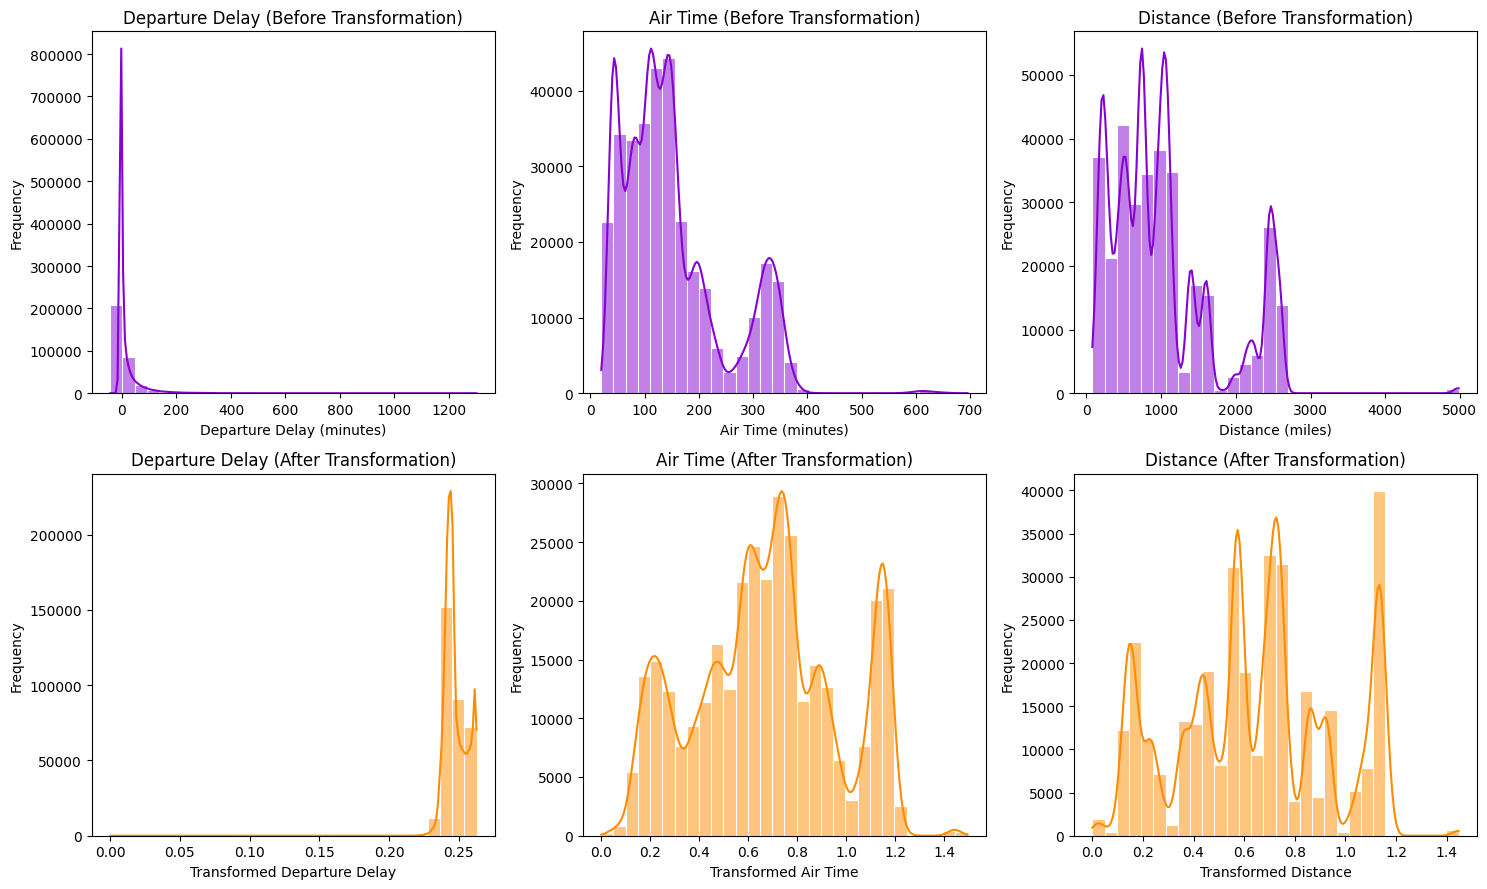

In [ ]:
# Identify the features that might need a Box-Cox transformation
skewed_features = ['dep_delay', 'air_time', 'distance']

# Copy the dataset
X_transformed = X_encoded.copy()

# Apply Box-Cox transformation
for feature in skewed_features:
    # Adding a constant value to make all values positive
    X_transformed[feature] = X_transformed[feature] + abs(X_transformed[feature].min()) + 1
    X_transformed[feature], _ = stats.boxcox(X_transformed[feature])


# Plot histograms of 'dep_delay', 'air_time', and 'distance' before transformation
plt.figure(figsize=(15, 9))

plt.subplot(2, 3, 1)
plot_hist(df['dep_delay'], title='Departure Delay (Before Transformation)', xlabel='Departure Delay (minutes)', color='#8502d1')

plt.subplot(2, 3, 2)
plot_hist(df['air_time'], title='Air Time (Before Transformation)', xlabel='Air Time (minutes)', color='#8502d1')

plt.subplot(2, 3, 3)
plot_hist(df['distance'], title='Distance (Before Transformation)', xlabel='Distance (miles)', color='#8502d1')


# Plot histograms of 'dep_delay', 'air_time', and 'distance' after transformation
plt.subplot(2, 3, 4)
plot_hist(X_transformed['dep_delay'], title='Departure Delay (After Transformation)', xlabel='Transformed Departure Delay', color='darkorange')

plt.subplot(2, 3, 5)
plot_hist(X_transformed['air_time'], title='Air Time (After Transformation)', xlabel='Transformed Air Time', color='darkorange')

plt.subplot(2, 3, 6)
plot_hist(X_transformed['distance'], title='Distance (After Transformation)', xlabel='Transformed Distance', color='darkorange')

# Set global tick label size
plt.rcParams['xtick.labelsize'] = 'small'  # for x-axis
plt.rcParams['ytick.labelsize'] = 'small'  # for y-axis

plt.tight_layout()
plt.show()

In [ ]:
X_transformed.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,-1.630263,-1.679414,0.247770,-0.290559,0.959361,0.860244,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,-1.630263,-1.679414,0.249037,-0.290559,0.959361,0.865612,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,-1.630263,-1.679414,0.247770,0.558148,0.783470,0.743137,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,-1.630263,-1.679414,0.245580,-1.457249,0.850771,0.916369,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,-1.630263,-1.679414,0.240943,1.545420,0.625846,0.584809,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [ ]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   month                          327346 non-null  float64
 1   day                            327346 non-null  float64
 2   dep_delay                      327346 non-null  float64
 3   dest                           327346 non-null  float64
 4   air_time                       327346 non-null  float64
 5   distance                       327346 non-null  float64
 6   origin_JFK                     327346 non-null  bool   
 7   origin_LGA                     327346 non-null  bool   
 8   name_Alaska Airlines Inc.      327346 non-null  bool   
 9   name_American Airlines Inc.    327346 non-null  bool   
 10  name_Delta Air Lines Inc.      327346 non-null  bool   
 11  name_Endeavor Air Inc.         327346 non-null  bool   
 12  name_Envoy Air                